In [39]:
import pandas as pd
import math as math

In [2]:
EVs = pd.read_csv("SQL_Complete_Electric_Vehicle_Population_Info.csv")
EVs.info()           

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 262961 entries, 0 to 262960
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   County                                             262961 non-null  object 
 1   City                                               262961 non-null  object 
 2   State                                              262961 non-null  object 
 3   Postal Code                                        262961 non-null  int64  
 4   Model Year                                         262961 non-null  int64  
 5   Make                                               262961 non-null  object 
 6   Model                                              262961 non-null  object 
 7   Electric Vehicle Type                              262961 non-null  object 
 8   Clean Alternative Fuel Vehicle (CAFV) Eligibility  262961 non-null  object

In [3]:
EVs.head()

,County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,most_used_utility,pct_diff_from_avg_wa_range
0,Thurston,Olympia,WA,98512,2024,AUDI,Q5 E,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,23,45300,22,263239938,POINT (-122.90787 46.9461),PUGET SOUND ENERGY INC,55412,-44.89
1,Yakima,Wapato,WA,98951,2018,AUDI,A3,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,16,39500,15,318160860,POINT (-120.42083 46.44779),PACIFICORP,2267,-61.66
2,King,Seattle,WA,98125,2015,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,84,29010,46,184963586,POINT (-122.30253 47.72656),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),44532,101.28
3,King,Kent,WA,98031,2019,AUDI,E-TRON,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,204,74800,11,259426821,POINT (-122.17743 47.41185),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),94223,388.83
4,Snohomish,Bothell,WA,98021,2022,TESLA,MODEL X,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,120990,1,208182236,POINT (-122.18384 47.8031),PUGET SOUND ENERGY INC,55412,NaN


In [4]:
EVs.columns

Index(['County', 'City', 'State', 'Postal Code', 'Model Year', 'Make', 'Model',
       'Electric Vehicle Type',
       'Clean Alternative Fuel Vehicle (CAFV) Eligibility', 'Electric Range',
       'Base MSRP', 'Legislative District', 'DOL Vehicle ID',
       'Vehicle Location', 'Electric Utility', 'most_used_utility',
       'pct_diff_from_avg_wa_range'],
      dtype='object')

In [5]:
EVs=EVs[['County','City','State','Model Year','Make','Model','Electric Vehicle Type','Clean Alternative Fuel Vehicle (CAFV) Eligibility','Electric Range','Base MSRP','Electric Utility','most_used_utility','pct_diff_from_avg_wa_range']]

In [6]:
EVs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 262961 entries, 0 to 262960
Data columns (total 13 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   County                                             262961 non-null  object 
 1   City                                               262961 non-null  object 
 2   State                                              262961 non-null  object 
 3   Model Year                                         262961 non-null  int64  
 4   Make                                               262961 non-null  object 
 5   Model                                              262961 non-null  object 
 6   Electric Vehicle Type                              262961 non-null  object 
 7   Clean Alternative Fuel Vehicle (CAFV) Eligibility  262961 non-null  object 
 8   Electric Range                                     262961 non-null  int64 

In [7]:
EVs.dtypes

County                                                object
City                                                  object
State                                                 object
Model Year                                             int64
Make                                                  object
Model                                                 object
Electric Vehicle Type                                 object
Clean Alternative Fuel Vehicle (CAFV) Eligibility     object
Electric Range                                         int64
Base MSRP                                              int64
Electric Utility                                      object
most_used_utility                                      int64
pct_diff_from_avg_wa_range                           float64
dtype: object

In [8]:
EVs['County']=EVs['County'].astype('string')
EVs['City']=EVs['City'].astype('string')
EVs['State']=EVs['State'].astype('string')
EVs['Make']=EVs['Make'].astype('string')
EVs['Model']=EVs['Model'].astype('string')
EVs['Electric Vehicle Type']=EVs['Electric Vehicle Type'].astype('string')
EVs['Clean Alternative Fuel Vehicle (CAFV) Eligibility']=EVs['Clean Alternative Fuel Vehicle (CAFV) Eligibility'].astype('string')
EVs['Electric Utility']=EVs['Electric Utility'].astype('string')

In [9]:
EVs.dtypes

County                                               string[python]
City                                                 string[python]
State                                                string[python]
Model Year                                                    int64
Make                                                 string[python]
Model                                                string[python]
Electric Vehicle Type                                string[python]
Clean Alternative Fuel Vehicle (CAFV) Eligibility    string[python]
Electric Range                                                int64
Base MSRP                                                     int64
Electric Utility                                     string[python]
most_used_utility                                             int64
pct_diff_from_avg_wa_range                                  float64
dtype: object

<Axes: xlabel='Electric Vehicle Type'>

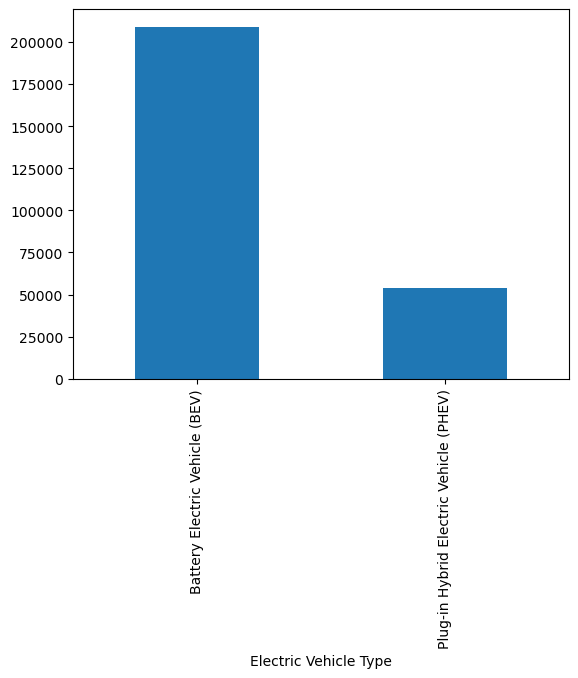

In [10]:
EVs['Electric Vehicle Type'].value_counts().plot(kind='bar')

In [11]:
pd.pivot_table(EVs, index=["Make", "Model"], values="Base MSRP")

Base MSRP
Make                 Model               
ACURA                ZDX     64500.000000
ALFA ROMEO           TONALE  43696.515152
AUDI                 A3      38694.117647
                     A6      65900.000000
                     A7 E    74900.000000
...                                   ...
VOLVO                V60     70526.767677
                     XC40    50881.005061
                     XC60    56004.530744
                     XC90    68214.995622
WHEEGO ELECTRIC CARS WHEEGO  32995.000000

[176 rows x 1 columns]

In [12]:
pd.pivot_table(EVs, index=["Make", "Model"], values="Base MSRP", aggfunc=["min","max","mean"])

min       max          mean
                            Base MSRP Base MSRP     Base MSRP
Make                 Model                                   
ACURA                ZDX        64500     64500  64500.000000
ALFA ROMEO           TONALE     36495     43845  43696.515152
AUDI                 A3         37900     39500  38694.117647
                     A6         65900     65900  65900.000000
                     A7 E       74900     74900  74900.000000
...                               ...       ...           ...
VOLVO                V60        67300     71250  70526.767677
                     XC40       48250     53990  50881.005061
                     XC60       52900     61150  56004.530744
                     XC90       63450     76200  68214.995622
WHEEGO ELECTRIC CARS WHEEGO     32995     32995  32995.000000

[176 rows x 3 columns]

In [13]:
pd.pivot_table(EVs, index=["Make","Model"], values="Electric Range", aggfunc="mean", columns=["Model Year"], margins=True, margins_name="Average Range per Model Year")

Model Year                           1999  2000   2008        2010       2011  \
Make                         Model                                              
ACURA                        ZDX      NaN   NaN    NaN         NaN        NaN   
ALFA ROMEO                   TONALE   NaN   NaN    NaN         NaN        NaN   
AUDI                         A3       NaN   NaN    NaN         NaN        NaN   
                             A6       NaN   NaN    NaN         NaN        NaN   
                             A7 E     NaN   NaN    NaN         NaN        NaN   
...                                   ...   ...    ...         ...        ...   
VOLVO                        XC40     NaN   NaN    NaN         NaN        NaN   
                             XC60     NaN   NaN    NaN         NaN        NaN   
                             XC90     NaN   NaN    NaN         NaN        NaN   
WHEEGO ELECTRIC CARS         WHEEGO   NaN   NaN    NaN  100.000000        NaN   
Average Range per Model Year         74.0  58.0  209.0  231.818182  71.150327   

Model Year                               2012       2013       2014  \
Make                         Model                                    
ACURA                        ZDX          NaN        NaN        NaN   
ALFA ROMEO                   TONALE       NaN        NaN        NaN   
AUDI                         A3           NaN        NaN        NaN   
                             A6           NaN        NaN        NaN   
                             A7 E         NaN        NaN        NaN   
...                                       ...        ...        ...   
VOLVO                        XC40         NaN        NaN        NaN   
                             XC60         NaN        NaN        NaN   
                             XC90         NaN        NaN        NaN   
WHEEGO ELECTRIC CARS         WHEEGO       NaN        NaN        NaN   
Average Range per Model Year         59.73431  78.946033  79.073431   

Model Year                                2015        2016  ...        2018  \
Make                         Model                          ...               
ACURA                        ZDX           NaN         NaN  ...         NaN   
ALFA ROMEO                   TONALE        NaN         NaN  ...         NaN   
AUDI                         A3            NaN   16.000000  ...   16.000000   
                             A6            NaN         NaN  ...         NaN   
                             A7 E          NaN         NaN  ...         NaN   
...                                        ...         ...  ...         ...   
VOLVO                        XC40          NaN         NaN  ...         NaN   
                             XC60          NaN         NaN  ...   17.000000   
                             XC90          NaN   13.000000  ...   19.000000   
WHEEGO ELECTRIC CARS         WHEEGO        NaN         NaN  ...         NaN   
Average Range per Model Year         95.651405  100.903605  ...  157.357463   

Model Year                                 2019        2020       2021  \
Make                         Model                                       
ACURA                        ZDX            NaN         NaN        NaN   
ALFA ROMEO                   TONALE         NaN         NaN        NaN   
AUDI                         A3             NaN         NaN        NaN   
                             A6             NaN         NaN        NaN   
                             A7 E           NaN         NaN  24.000000   
...                                         ...         ...        ...   
VOLVO                        XC40           NaN         NaN   0.000000   
                             XC60     17.000000   18.351648  18.000000   
                             XC90     17.000000   18.000000  18.000000   
WHEEGO ELECTRIC CARS         WHEEGO         NaN         NaN        NaN   
Average Range per Model Year         176.435959  237.378574  12.278301   

Model Year                     

In [46]:
pd.pivot_table(EVs, index=['Make','Model'],values='Base MSRP',aggfunc='mean',columns=['Model Year'],margins=True,margins_name='Average Price per Model Year')

Model Year                              1999     2000     2008           2010  \
Make                         Model                                              
ACURA                        ZDX         NaN      NaN      NaN            NaN   
ALFA ROMEO                   TONALE      NaN      NaN      NaN            NaN   
AUDI                         A3          NaN      NaN      NaN            NaN   
                             A6          NaN      NaN      NaN            NaN   
                             A7 E        NaN      NaN      NaN            NaN   
...                                      ...      ...      ...            ...   
VOLVO                        XC40        NaN      NaN      NaN            NaN   
                             XC60        NaN      NaN      NaN            NaN   
                             XC90        NaN      NaN      NaN            NaN   
WHEEGO ELECTRIC CARS         WHEEGO      NaN      NaN      NaN   32995.000000   
Average Price per Model Year         11845.0  11580.0  98902.5  103863.181818   

Model Year                                   2011        2012         2013  \
Make                         Model                                           
ACURA                        ZDX              NaN         NaN          NaN   
ALFA ROMEO                   TONALE           NaN         NaN          NaN   
AUDI                         A3               NaN         NaN          NaN   
                             A6               NaN         NaN          NaN   
                             A7 E             NaN         NaN          NaN   
...                                           ...         ...          ...   
VOLVO                        XC40             NaN         NaN          NaN   
                             XC60             NaN         NaN          NaN   
                             XC90             NaN         NaN          NaN   
WHEEGO ELECTRIC CARS         WHEEGO           NaN         NaN          NaN   
Average Price per Model Year         34585.163399  37945.8159  38565.25998   

Model Year                                  2014          2015          2016  \
Make                         Model                                             
ACURA                        ZDX             NaN           NaN           NaN   
ALFA ROMEO                   TONALE          NaN           NaN           NaN   
AUDI                         A3              NaN           NaN  37900.000000   
                             A6              NaN           NaN           NaN   
                             A7 E            NaN           NaN           NaN   
...                                          ...           ...           ...   
VOLVO                        XC40            NaN           NaN           NaN   
                             XC60            NaN           NaN           NaN   
                             XC90            NaN           NaN  68100.000000   
WHEEGO ELECTRIC CARS         WHEEGO          NaN           NaN           NaN   
Average Price per Model Year         40605.32145  40985.854899  45063.022942   

Model Year                           ...          2018          2019  \
Make                         Model   ...                               
ACURA                        ZDX     ...           NaN           NaN   
ALFA ROMEO                   TONALE  ...           NaN           NaN   
AUDI                         A3      ...  39500.000000           NaN   
                             A6      ...           NaN           NaN   
                             A7 E    ...           NaN           NaN   
...                                  ...           ...           ...   
VOLVO                        XC40    ...           NaN           NaN   
                             XC60    ...  52900.000000  53054.128440   
                             XC90    ...  64950.000000  67000.000000   
WHEEGO ELECTRIC CARS         WHEEGO  ...           NaN           NaN   
Average Price per Model Ye

In [15]:
import seaborn as sns

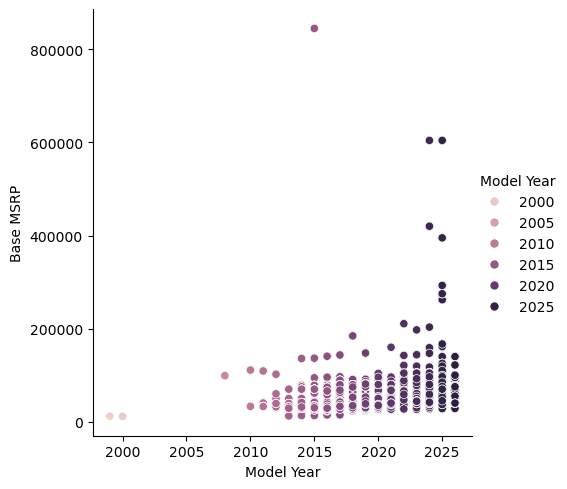

In [16]:
sns.relplot(data=EVs, x="Model Year", y="Base MSRP", kind="scatter", hue="Model Year")

In [17]:
EVs.corr(numeric_only = True)

,Model Year,Electric Range,Base MSRP,most_used_utility,pct_diff_from_avg_wa_range
Model Year,1.000000,-0.541541,0.178824,0.075277,-0.246175
Electric Range,-0.541541,1.000000,-0.039760,-0.026183,1.000000
Base MSRP,0.178824,-0.039760,1.000000,0.067910,0.050920
most_used_utility,0.075277,-0.026183,0.067910,1.000000,0.054992
pct_diff_from_avg_wa_range,-0.246175,1.000000,0.050920,0.054992,1.000000


<Axes: >

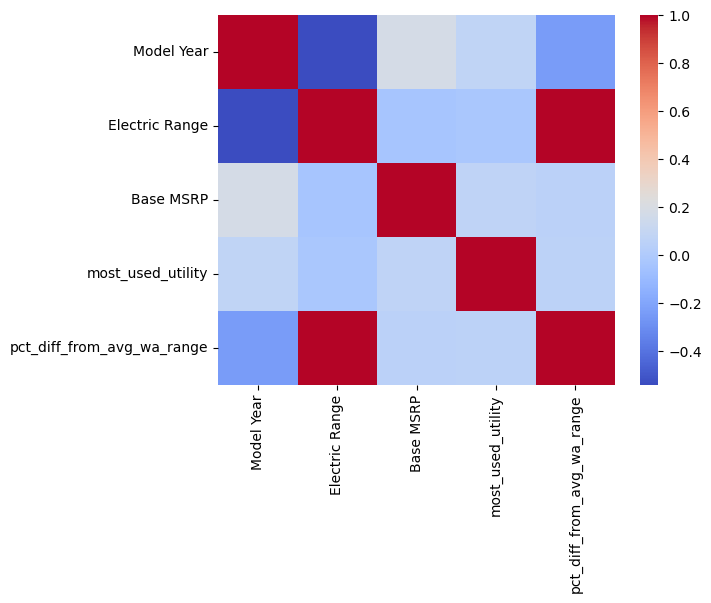

In [18]:
sns.heatmap(data=EVs.corr(numeric_only=True), cmap="coolwarm")

In [19]:
Q1=EVs['Base MSRP'].quantile(0.25)

In [20]:
Q3=EVs['Base MSRP'].quantile(0.75)

In [21]:
IQR=Q3-Q1

In [22]:
print (Q1)
print (Q3)
print (IQR)

37850.0
51095.0
13245.0


In [23]:
print(f'Low price outlier threshold:  {Q1 - 1.5 * IQR}')
print(f'High price outlier threshold: {Q3 + 1.5 * IQR}')

Low price outlier threshold:  17982.5
High price outlier threshold: 70962.5


In [24]:
MSRP_Lower = (EVs['Base MSRP'] < (Q1 - 1.5 * IQR))
EVs.loc[MSRP_Lower, 'Make']

27        SMART
282       SMART
353       SMART
2368      SMART
2919      SMART
          ...  
255302    SMART
257867    SMART
260500     FORD
261389    SMART
262362    SMART
Name: Make, Length: 191, dtype: string

In [25]:
EVs.loc[MSRP_Lower, 'Make'].value_counts()

Make
SMART    181
FORD      10
Name: count, dtype: Int64

In [26]:
MSRP_Higher = (EVs['Base MSRP'] > (Q3 + 1.5 * IQR))
EVs.loc[MSRP_Higher, 'Make']

3                  AUDI
4                 TESLA
13                  BMW
14                TESLA
18                 AUDI
              ...      
262894    MERCEDES-BENZ
262915            TESLA
262930              GMC
262946          PORSCHE
262948            TESLA
Name: Make, Length: 26550, dtype: string

In [27]:
EVs.loc[MSRP_Higher, 'Make'].value_counts()

Make
TESLA            10804
RIVIAN            5513
BMW               3222
MERCEDES-BENZ     1420
AUDI              1374
PORSCHE           1267
VOLVO             1229
GMC                475
CHEVROLET          392
LUCID              267
CADILLAC           187
LAND ROVER         163
LEXUS              154
JAGUAR              24
LAMBORGHINI         18
GENESIS             16
FISKER              10
BENTLEY              8
ROLLS-ROYCE          7
Name: count, dtype: Int64

In [44]:
math.floor(EVs['Base MSRP'].mean())

47183

In [42]:
math.ceil(EVs['Electric Range'].mean())

42

In [52]:
def value_proposition(Base_MSRP, Electric_Range):
        if Base_MSRP < 47183 and Electric_Range > 42:
            return "Great Value"
        elif Base_MSRP > 47183 and Electric_Range > 42:
            return "Good Value"
        elif Base_MSRP < 47183 and Electric_Range < 42:
            return "Good Value"
        else:
            return "Bad Value"
EVs['Proposition']=EVs.apply(lambda row:value_proposition(row['Base MSRP'],row['Electric Range']),axis=1)

In [54]:
EVs[['Make', 'Model', 'Base MSRP', 'Electric Range', 'Proposition']]

,Make,Model,Base MSRP,Electric Range,Proposition
0,AUDI,Q5 E,45300,23,Good Value
1,AUDI,A3,39500,16,Good Value
2,NISSAN,LEAF,29010,84,Great Value
3,AUDI,E-TRON,74800,204,Good Value
4,TESLA,MODEL X,120990,0,Bad Value
...,...,...,...,...,...
262956,HYUNDAI,IONIQ 5,41800,0,Good Value
262957,NISSAN,LEAF,29010,84,Great Value
262958,TESLA,MODEL Y,43990,0,Good Value
262959,TESLA,MODEL Y,39990,0,Good Value


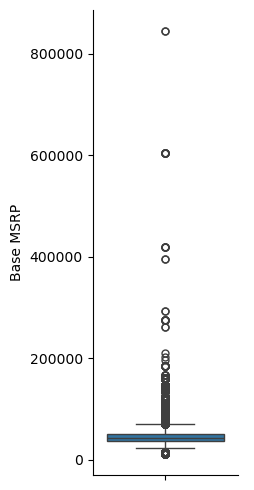

In [29]:
sns.catplot(data=EVs,y='Base MSRP',kind='box',aspect=0.5)

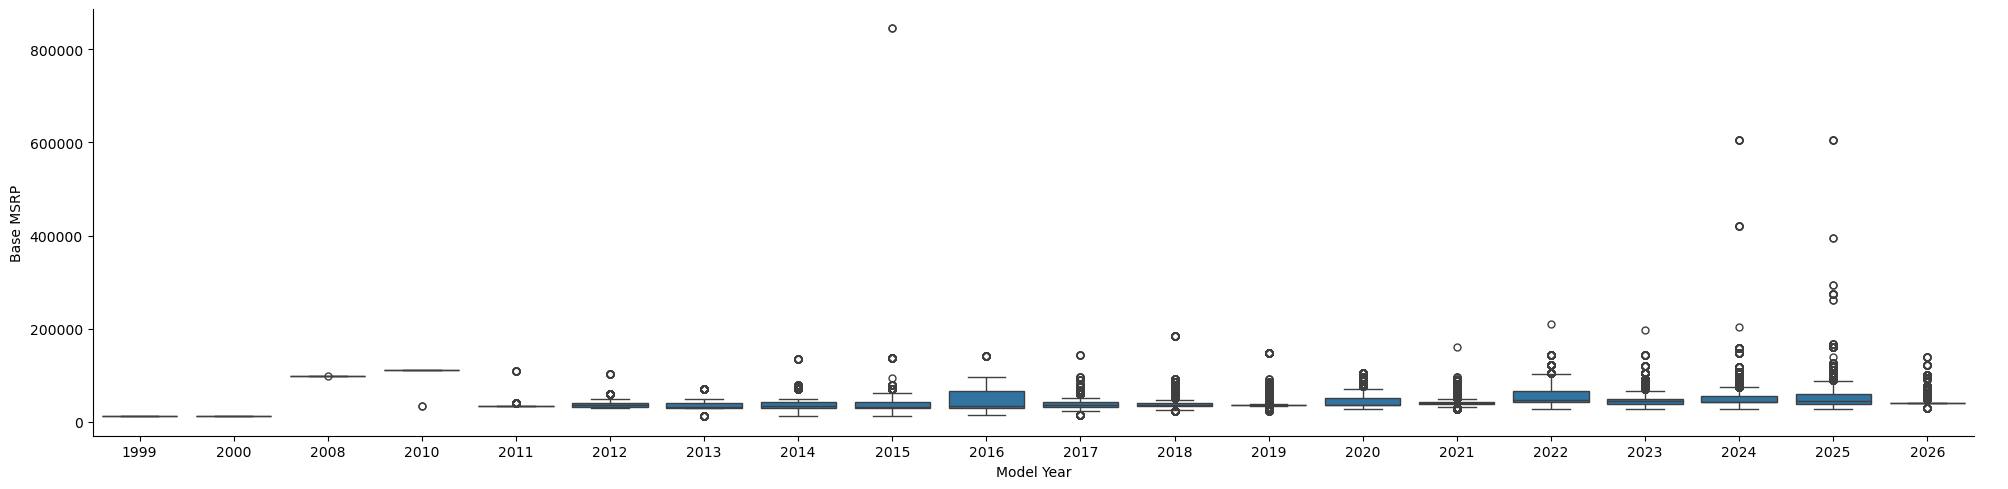

In [30]:
sns.catplot(data=EVs,x='Model Year',y='Base MSRP',kind='box',aspect=4)

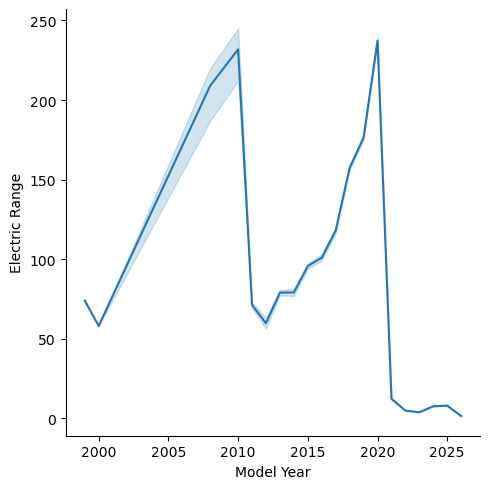

In [31]:
sns.relplot(data=EVs,x='Model Year',y='Electric Range',kind='line')

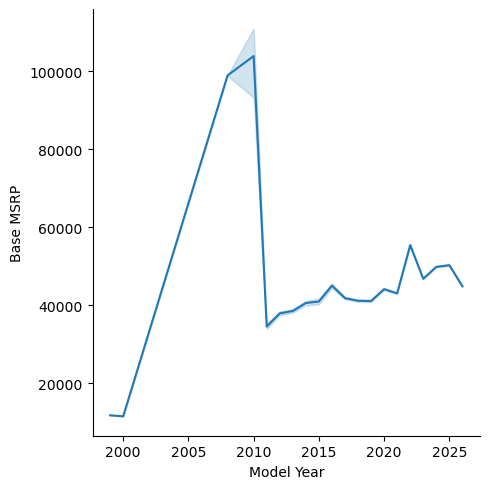

In [32]:
sns.relplot(data=EVs,x='Model Year',y='Base MSRP',kind='line')

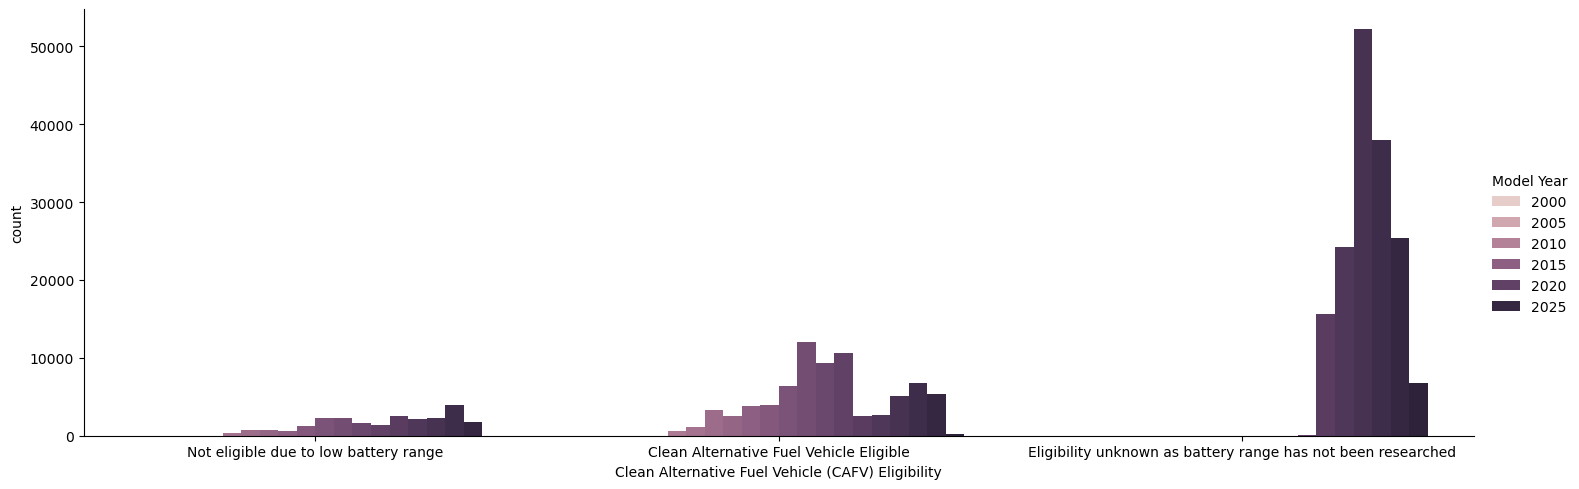

In [33]:
sns.catplot(data=EVs,x='Clean Alternative Fuel Vehicle (CAFV) Eligibility',kind='count',hue='Model Year',aspect=3)

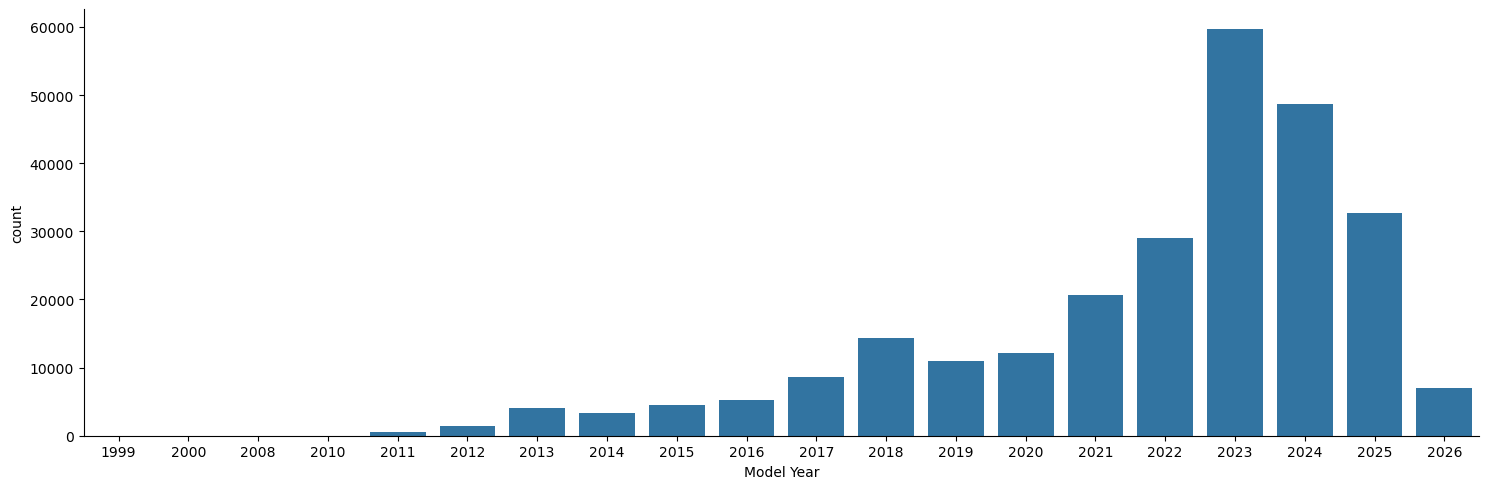

In [34]:
sns.catplot(data=EVs,x='Model Year',kind='count',aspect=3)